In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/experiment/all_scenarios.csv")

In [4]:
df_sorted = df.sort_values(by = "Worst bridge delay", ascending=False)

In [5]:
df_sorted.head(7)

,Unnamed: 0,prob_A,prob_B,prob_C,prob_D,Run,Average driving time,Probs,Worst bridge delay,Worst bridge name
81,81,0.10,0.20,0.4,0.8,81,1659.139514,"{'A': 0.1, 'B': 0.2, 'C': 0.4, 'D': 0.8}",142.708522,MEGHNA BRIDGE
86,86,0.10,0.20,0.4,0.8,86,1733.058235,"{'A': 0.1, 'B': 0.2, 'C': 0.4, 'D': 0.8}",142.068187,KANCHPUR PC GIRDER BRIDGE
59,59,0.00,0.05,0.1,0.2,59,930.495618,"{'A': 0, 'B': 0.05, 'C': 0.1, 'D': 0.2}",141.343968,KANCHPUR PC GIRDER BRIDGE
78,78,0.05,0.10,0.2,0.4,78,995.235294,"{'A': 0.05, 'B': 0.1, 'C': 0.2, 'D': 0.4}",140.895706,KANCHPUR PC GIRDER BRIDGE
76,76,0.05,0.10,0.2,0.4,76,1076.848411,"{'A': 0.05, 'B': 0.1, 'C': 0.2, 'D': 0.4}",140.676844,Daud Kandi Bridge
68,68,0.00,0.10,0.2,0.4,68,1127.207407,"{'A': 0, 'B': 0.1, 'C': 0.2, 'D': 0.4}",140.522161,KANCHPUR PC GIRDER BRIDGE
63,63,0.00,0.10,0.2,0.4,63,957.542468,"{'A': 0, 'B': 0.1, 'C': 0.2, 'D': 0.4}",140.500388,MEGHNA BRIDGE


In [6]:
df_sc1to9 = df.iloc[10:90]
df_bridge_count = df_sc1to9[df_sc1to9["Worst bridge delay"] != 0]
df_bridge_count = df_bridge_count['Worst bridge name'].value_counts()
df_bridge_count.head()

Worst bridge name
KANCHPUR PC GIRDER BRIDGE    10
MEGHNA BRIDGE                 8
Ginlatoly                     5
Daud Kandi Bridge             5
BORO KUMIRA BRIDGE            4
Name: count, dtype: int64

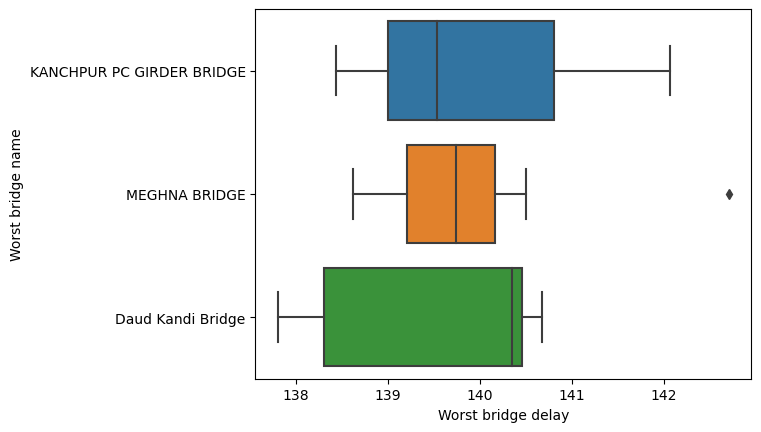

In [7]:
df_counts_top3 = df_sc1to9.loc[(df_sc1to9["Worst bridge name"] == "KANCHPUR PC GIRDER BRIDGE") |  (df_sc1to9["Worst bridge name"] == "Daud Kandi Bridge") | (df_sc1to9["Worst bridge name"] == "MEGHNA BRIDGE")]
ax = sns.boxplot(x=df_counts_top3["Worst bridge delay"], 
                 y=df_counts_top3["Worst bridge name"], 
                orient="h", palette ="tab10")

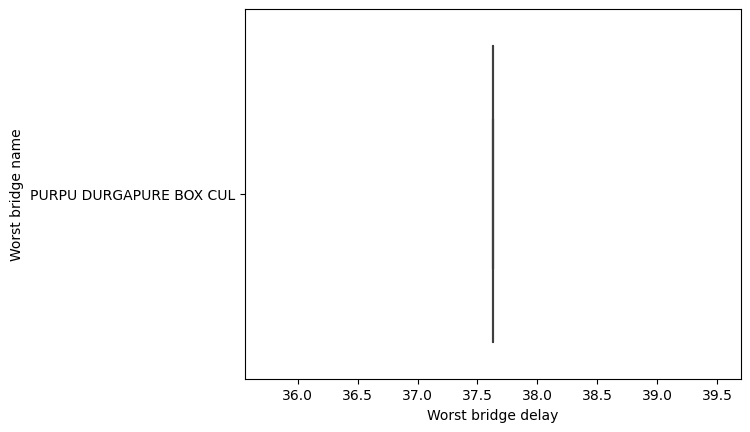

In [8]:
df_counts_4_5 = df_sc1to9.loc[(df_sc1to9["Worst bridge name"] == "Mostapur Bridge") |  (df_sc1to9["Worst bridge name"] == "PURPU DURGAPURE BOX CUL")]
ax = sns.boxplot(x=df_counts_4_5["Worst bridge delay"], 
                 y=df_counts_4_5["Worst bridge name"], 
                orient="h", palette ="tab10")

In [9]:
df_sorted = df.iloc[10:90].sort_values(by = "Worst bridge delay", ascending=False).drop_duplicates(subset = 'Worst bridge name')

In [10]:
df_sorted.head(5)

,Unnamed: 0,prob_A,prob_B,prob_C,prob_D,Run,Average driving time,Probs,Worst bridge delay,Worst bridge name
81,81,0.10,0.2,0.4,0.8,81,1659.139514,"{'A': 0.1, 'B': 0.2, 'C': 0.4, 'D': 0.8}",142.708522,MEGHNA BRIDGE
86,86,0.10,0.2,0.4,0.8,86,1733.058235,"{'A': 0.1, 'B': 0.2, 'C': 0.4, 'D': 0.8}",142.068187,KANCHPUR PC GIRDER BRIDGE
76,76,0.05,0.1,0.2,0.4,76,1076.848411,"{'A': 0.05, 'B': 0.1, 'C': 0.2, 'D': 0.4}",140.676844,Daud Kandi Bridge
89,89,0.10,0.2,0.4,0.8,89,1687.042572,"{'A': 0.1, 'B': 0.2, 'C': 0.4, 'D': 0.8}",140.412538,DHOOM GHAT PC GIRDER
71,71,0.05,0.1,0.2,0.4,71,976.209768,"{'A': 0.05, 'B': 0.1, 'C': 0.2, 'D': 0.4}",68.004059,LAMUA BRIDGE


In [11]:
dfBar = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40,50,60,70,80]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Average driving time"].mean()
    maxx = df.iloc[x:(x+10)]["Worst bridge delay"].max()
    minn = df.iloc[x:(x+10)]["Worst bridge delay"].min()
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    dfMaxx = pd.DataFrame([[scenario,"Max Delay of worst run", maxx]], columns = ["Scenario", "Variable", "Time"])
    dfMinn = pd.DataFrame([[scenario,"Max Delay of best run", minn]], columns = ["Scenario", "Variable", "Time"])
    
    dfBar = dfBar.append(dfAve)
    dfBar = dfBar.append(dfMaxx)
    dfBar = dfBar.append(dfMinn)
dfBar.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [12]:
sns.barplot(x='Scenario', y='Time', hue='Variable', data=dfBar, palette = 'tab10')

ValueError: min() arg is an empty sequence

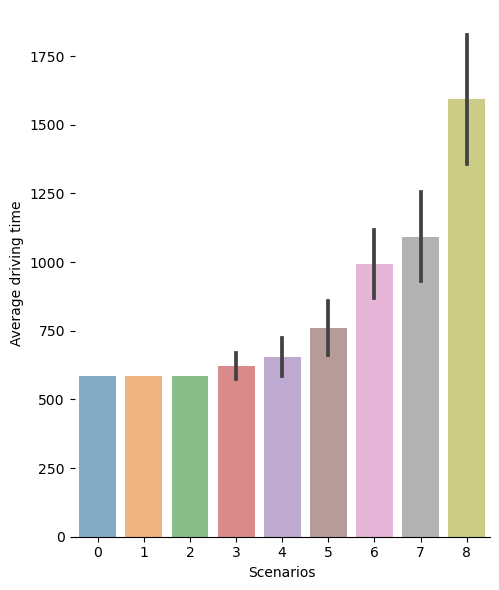

In [13]:
g = sns.catplot(
    data=df, kind="bar",
    x="Probs", y="Average driving time", errorbar="sd", palette="tab10", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("Scenarios", "Average driving time")
#g.set_xticks(range(9))
g.set_xticklabels([0,1,2,3,4,5,6,7,8])

In [14]:
df_result = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40,50,60,70,80]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Average driving time"].mean()
    maxx = df.iloc[x:(x+10)]["Average driving time"].max()
    minn = df.iloc[x:(x+10)]["Average driving time"].min()
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    # incldue min and max values with hue="Average driving time", for seaborn to plot shaded areas (see plot below)
    min_fill = pd.DataFrame([[scenario,"Average driving time", maxx]], columns = ["Scenario", "Variable", "Time"])
    max_fill = pd.DataFrame([[scenario,"Average driving time", minn]], columns = ["Scenario", "Variable", "Time"])
    # include min and max values again with correct hues, for seaborn to plot distinct min and max plot lines (see plot below)
    dfmin = pd.DataFrame([[scenario,"Minimum driving time", minn]], columns =["Scenario", "Variable", "Time"])
    dfmax = pd.DataFrame([[scenario,"Maximum driving time", maxx]], columns =["Scenario", "Variable", "Time"])
    


    df_result = df_result.append(dfAve)
    df_result = df_result.append(min_fill)
    df_result = df_result.append(max_fill)
    df_result = df_result.append(dfmin)
    df_result = df_result.append(dfmax)

dfBar.head()

AttributeError: 'DataFrame' object has no attribute 'append'

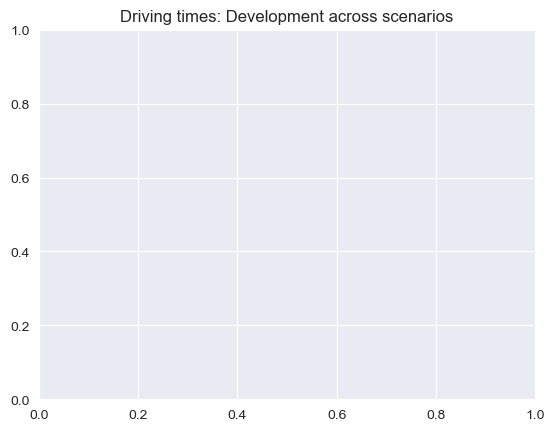

In [15]:
sns.set_style('darkgrid')
sns.lineplot(x='Scenario', y='Time', hue='Variable', data=df_result, palette='crest')


# fill space between minimum and maximum drive time 
#ax.fill_between(df_result,
 #               y1=df_result.loc[(df_result['Variable']=='Minimum driving time')].drop(columns=['Scenario','Variable']))#,
               # y2=df_result.loc[(df_result['Variable']=='Maximum driving time')].drop(columns=['Scenario','Variable']))

plt.title('Driving times: Development across scenarios')
plt.savefig('../report/figures/driving_time.png')

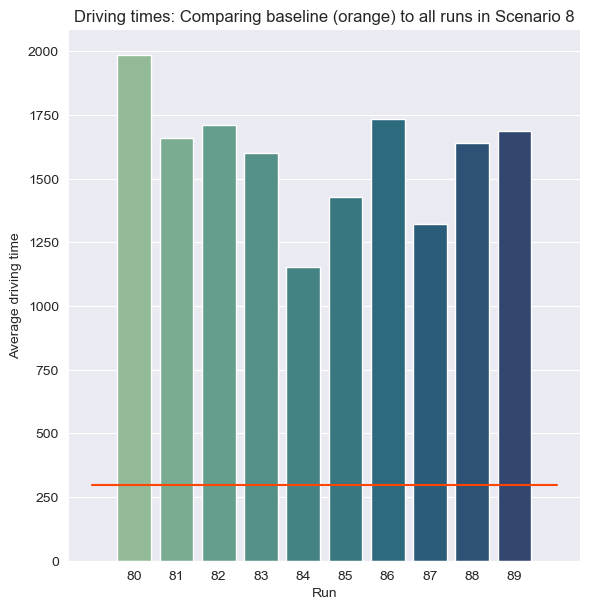

In [16]:
g = sns.catplot(
    data=df.tail(10), kind="bar",
    x="Run", y="Average driving time", errorbar="sd", palette="crest", alpha=1, height=6)
g.despine(left=True)
g.set_axis_labels("Run", "Average driving time")
sns.lineplot(x = [-1,10], y=299, color='orangered')
plt.title('Driving times: Comparing baseline (orange) to all runs in Scenario 8')
plt.savefig('../report/figures/scenarios_one_eight.png')

In [17]:
from itertools import chain 
df_delay = pd.read_csv("../data/experiment/all_scenarios.csv").drop(columns=['Unnamed: 0','prob_A','prob_B','prob_C','prob_D','Run','Probs'])
scenario = list([[i]*10 for i in range(0,9)])
scenario = list(chain.from_iterable(scenario))
df_delay['Scenario'] = scenario
df_delay = df_delay.rename(columns={'Worst bridge delay':'delay time'})


In [18]:
df_delay

,Average driving time,delay time,Worst bridge name,Scenario
0,585.000000,0.000000,CORNAIL HAT BOX CULVERT,0
1,585.000000,0.000000,CORNAIL HAT BOX CULVERT,0
2,585.000000,0.000000,CORNAIL HAT BOX CULVERT,0
3,585.000000,0.000000,CORNAIL HAT BOX CULVERT,0
4,585.000000,0.000000,CORNAIL HAT BOX CULVERT,0
...,...,...,...,...
85,1428.200521,140.460640,Daud Kandi Bridge,8
86,1733.058235,142.068187,KANCHPUR PC GIRDER BRIDGE,8
87,1324.392340,38.033402,Ginlatoly,8
88,1638.760791,138.849377,MEGHNA BRIDGE,8


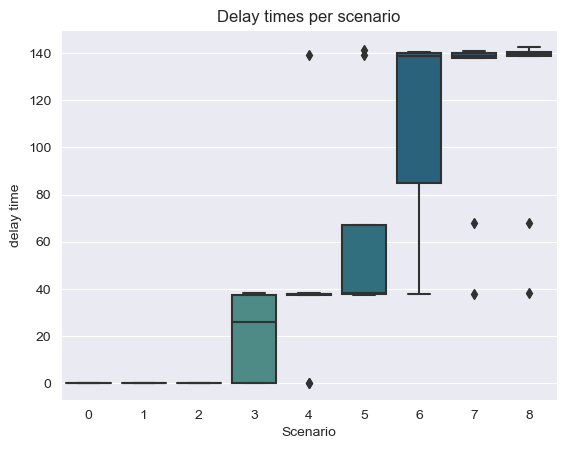

In [19]:
sns.boxplot(x='Scenario',y='delay time', data=df_delay, palette='crest');
plt.title('Delay times per scenario');
plt.savefig('../report/figures/delay_time.png')

In [20]:
df = pd.read_csv("../data/experiment/all_scenarios.csv").drop(columns=['Unnamed: 0'])
df_sorted = df.sort_values(by = "Worst bridge delay", ascending=False).drop_duplicates(subset = 'Worst bridge name')
df_sorted.shape

(21, 9)

In [21]:
df_bridge_count = df[df["Worst bridge delay"] != 0]
df_bridge_count = df_bridge_count['Worst bridge name'].value_counts()


In [22]:
worst_bridges = df.loc[(df["Worst bridge name"] == "KANCHPUR PC GIRDER BRIDGE") | 
                               (df["Worst bridge name"] == "MEGHNA BRIDGE") | 
                               (df["Worst bridge name"] == "Ginlatoly") | 
                               (df["Worst bridge name"] == "Daud Kandi Bridge") | 
                               (df["Worst bridge name"] == "BORO KUMIRA BRIDGE") | 
                               (df["Worst bridge name"] == "BDHOOM GHAT PC GIRDER") | 
                               (df["Worst bridge name"] == "MOLLIK PARA BRIDGE (R)") | 
                               (df["Worst bridge name"] == "SALAKHARPAD BRIDGE") | 
                               (df["Worst bridge name"] == "ISAMATI BOX CULVERT") | 
                               (df["Worst bridge name"] == "MUHURI BRIDGE") | 
                               (df["Worst bridge name"] == "BAROCONDO BRIDGE")]
worst_bridges = worst_bridges.sort_values(by='Worst bridge delay')

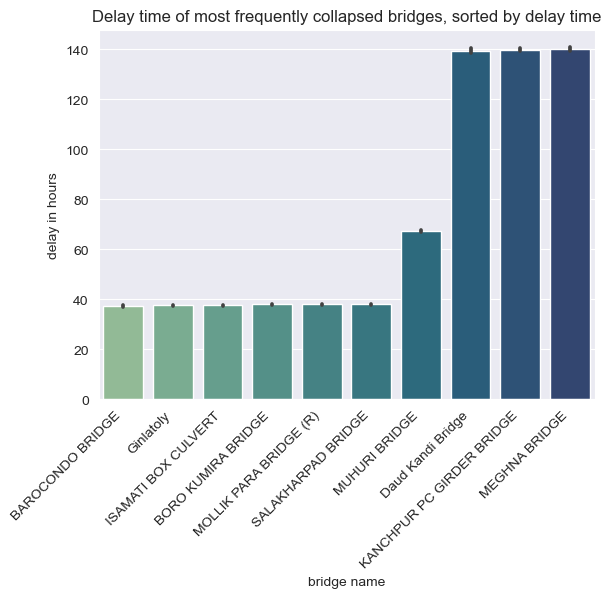

In [23]:
# rename columns for better naming in the plot 
worst_bridges = worst_bridges.rename(columns={"Worst bridge name":"bridge name", 
                                           "Worst bridge delay":"delay in hours"})

sns.set_style('darkgrid')
#sns.dark_palette("seagreen", n_colors=len(worst_bridges), start=2)

ax = sns.barplot(x='bridge name', y='delay in hours', data=worst_bridges, palette='crest');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha ='right')
plt.title("Delay time of most frequently collapsed bridges, sorted by delay time");
plt.savefig('../report/figures/delay_time_of_worst_bridged.png')

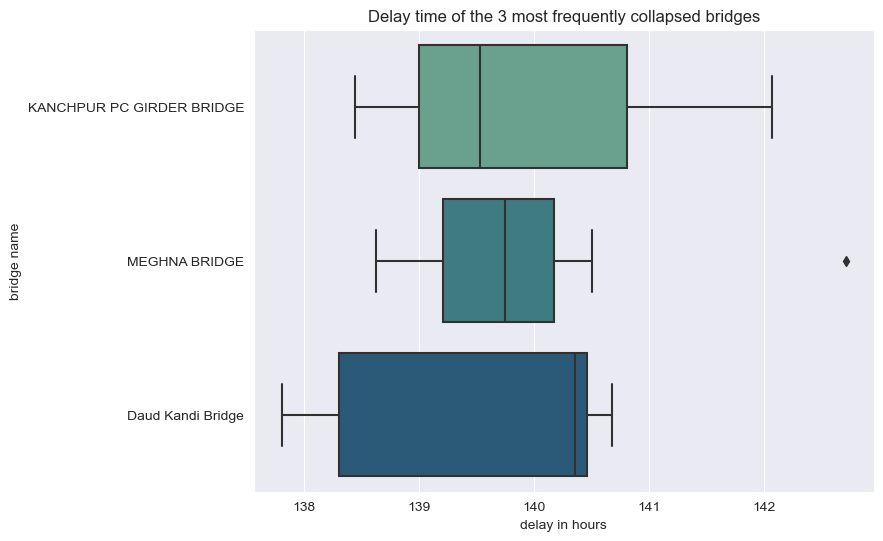

In [24]:
### show delaytime boxplots
worst3_bridges = df.loc[(df["Worst bridge name"] == "KANCHPUR PC GIRDER BRIDGE") | 
                               (df["Worst bridge name"] == "MEGHNA BRIDGE") | 
                               (df["Worst bridge name"] == "Daud Kandi Bridge")]

# rename columns for better naming in the plot 
worst3_bridges = worst3_bridges.rename(columns={"Worst bridge name":"bridge name", 
                                           "Worst bridge delay":"delay in hours"})

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=worst3_bridges["delay in hours"], y=worst3_bridges["bridge name"], orient="h", palette ="crest")
'plt.tight_layout()'
plt.title("Delay time of the 3 most frequently collapsed bridges")
plt.savefig('../report/figures/delay_time_3bridges.png')

In [25]:
import pandas as pd
import seaborn as sns
road = pd.read_csv('../data/raw/_roads3.csv')
bridge=pd.read_excel('../data/raw/BMMS_overview.xlsx')

In [26]:
N1Road=road.loc[road.road=='N1']
N1Bridge=bridge.loc[bridge.road=='N1']

In [27]:
dataset=N1Bridge.loc[N1Bridge.name=='KANCHPUR PC GIRDER BRIDGE']
dataset = pd.concat([dataset,N1Bridge.loc[N1Bridge.name=='Daud Kandi Bridge']])
dataset = pd.concat([dataset,N1Bridge.loc[N1Bridge.name=='MEGHNA BRIDGE']])
dataset=dataset.loc[:,['name','lat','lon']]
dataset

,name,lat,lon
12706,KANCHPUR PC GIRDER BRIDGE,23.705060,90.523214
12711,Daud Kandi Bridge,23.530384,90.702440
12709,MEGHNA BRIDGE,23.602760,90.615532


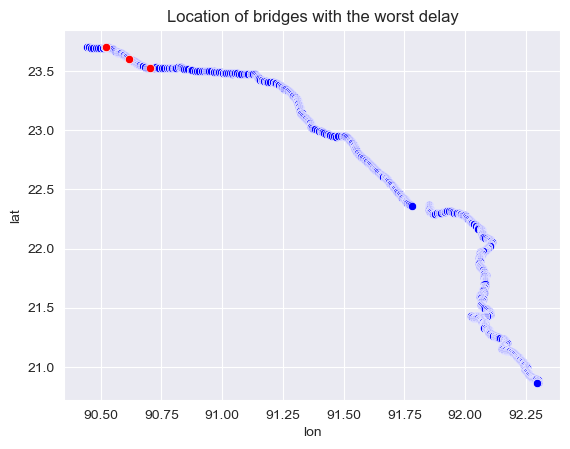

In [28]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
ax= plt.subplots()

ax=sns.scatterplot(x='lon', y='lat', data=N1Road,color='b')
ax=sns.scatterplot(x='lon', y='lat', data=dataset,color='r')
plt.title('Location of bridges with the worst delay')
plt.savefig('../report/figures/Location_worst3.png')
plt.show()